In [3]:
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd')

from profess_calculator import PROFESS_CPMD
import profess_io as pio
from cpmd import initialize_atoms

from ase.md.verlet import VelocityVerlet
from ase import units as au

import os
import numpy as np
from matplotlib import pyplot as plt

### Run CPMD for Al4, has the wrong density; this is just to see if the programm crashes due to some bugs

In [ ]:
# initialize
log = '/home/misa/projects/APDFT-CPMD/data/nuclei_md/Al4_cpmd'
pos_file = '/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/ion_step0.dat'
vel_file = '/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/vel_step0.dat'
cell_param = [[3.97, 0, 0], [0, 3.97, 0], [0, 0, 3.97]]
atoms = initialize_atoms(pos_file, vel_file, cell_param, pos_type='FRAC')

# set parameters for PROFESS calculation
dt = 1*units.fs
inpt_name = 'cpmd'
mu = 1
pos_type = 'CART'
pp_names = ['al.lda.recpot']
run_dir = '/home/misa/git_repositories/PROFESS/test/ase_cpmd'

# make empty calculator
calc = PROFESS_CPMD()
# pass calculator to atoms object
atoms.calc = calc
# initialize calc object with correct parameters
atoms.calc.initialize(atoms, dt, inpt_name, mu, pos_type, pp_names, run_dir)

In [ ]:
import pixiedust

In [ ]:
#%%pixie_debugger
# remove old logfile
try:
    os.remove(log)
except FileNotFoundError:
    print('Already deleted')
# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 1*units.fs, logfile=log)  # 1 fs time step.
f=dyn.run(10)

### BOMD of CD Si$_8$ in PROFESS with the HC KDEF

In [4]:
ekin = np.array(pio.parse_out_file('/home/misa/projects/APDFT-CPMD/data/BOMD/Si8_hc/hc.out', 'NVE Kinetic energy'))*au.Hartree
epot = np.array(pio.parse_out_file('/home/misa/projects/APDFT-CPMD/data/BOMD/Si8_hc/hc.out', 'NVE Potential energy'))*au.Hartree

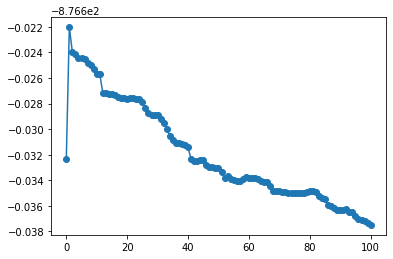

In [5]:
plt.plot(epot+ekin, '-o')

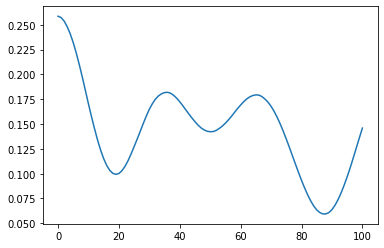

In [8]:
plt.plot(ekin)

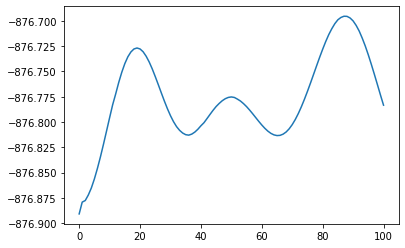

In [15]:
plt.plot(epot)

In [7]:
np.amax(epot+ekin)-np.amin(epot+ekin)

0.01545750103230148

In [14]:
0.02/8*au.Bohr/0.01

0.1322943026409603

In [18]:
cell=np.array([[5.413163315742E+00,    1.825461726280E-04,    1.825571035770E-04],
    [1.830800971960E-04,    5.432837327528E+00,   -4.518274185020E-04], [1.830910303800E-04,   -4.518274181430E-04 ,   5.432837327461E+00] ])
    
